In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt

import vtk

from vtk.util import numpy_support

In [2]:
vti_file_path = '../data/160_10-layer_mn.vtu'

In [3]:
# Create a reader for the VTI file
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName(vti_file_path)

In [4]:
# Update the reader to read the data
reader.Update()

# Get the output data
data = reader.GetOutput()

In [5]:
num_points = data.GetNumberOfPoints()
num_cells = data.GetNumberOfCells()
# Get the number of cell arrays
cell_data = data.GetCellData()
num_cell_arrays = cell_data.GetNumberOfArrays()
print("Number of Cell Arrays:", num_cell_arrays)
print("Number of Points:", num_points)
print("Number of Cells:", num_cells)

Number of Cell Arrays: 6
Number of Points: 12954816
Number of Cells: 12789203


In [6]:
# Print the names of cell arrays
for i in range(num_cell_arrays):
    array_name = cell_data.GetArrayName(i)
    print(f"Cell Array {i + 1} Name:", array_name)

Cell Array 1 Name: YarnIndex
Cell Array 2 Name: YarnTangent
Cell Array 3 Name: Location
Cell Array 4 Name: VolumeFraction
Cell Array 5 Name: SurfaceDistance
Cell Array 6 Name: Orientation


In [7]:
bounds = reader.GetOutput().GetBounds()
print(bounds)

(0.0, 5.188419818878174, 0.0, 5.188419818878174, 0.0, 2.0999999046325684)


In [10]:
points = data.GetPoints()
# Get the number of cells in the dataset
num_cells = data.GetNumberOfCells()

# Get the number of points
num_points = points.GetNumberOfPoints()

# Initialize an array to store the coordinates
coordinates = np.zeros((num_points, 3))

# Iterate through each point
for i in range(2):
    coordinates[i, :] = np.array(points.GetPoint(i))




In [11]:
print(coordinates[1, :]-coordinates[0, :])

spacing = [coordinates[1, 0]-coordinates[0, 0]]*3
print(spacing)

[0.020671 0.       0.      ]
[0.020671000704169273, 0.020671000704169273, 0.020671000704169273]


In [14]:
x_dim = np.ceil(bounds[1]/spacing[0]).astype(int)
y_dim = np.ceil(bounds[3]/spacing[1]).astype(int)
z_dim = np.ceil(bounds[5]/spacing[2]*2).astype(int)-1

print(x_dim+1,y_dim,z_dim)

252 251 203


In [15]:
# Access specific cell data array (assuming you have at least one cell data array)
if num_cell_arrays > 0:
    cell_data_array = cell_data.GetArray(0)

    numpy_array = numpy_support.vtk_to_numpy(cell_data_array).reshape(z_dim,y_dim,x_dim)
    print("Cell Data Array:", cell_data_array)
    cell_data_array = cell_data.GetArray(5)
    numpy_array2 = numpy_support.vtk_to_numpy(cell_data_array).reshape(z_dim,y_dim,x_dim,3)  

    # Ycell_data_array = cell_data.GetArray(0)ou can now work with the cell data array as needed

Cell Data Array: vtkTypeInt32Array (0x105aec620)
  Debug: Off
  Modified Time: 397
  Reference Count: 2
  Registered Events: (none)
  Name: YarnIndex
  Data type: int
  Size: 12789203
  MaxId: 12789202
  NumberOfComponents: 1
  Information: 0x0
  Name: YarnIndex
  Number Of Components: 1
  Number Of Tuples: 12789203
  Size: 12789203
  MaxId: 12789202
  LookupTable: (none)




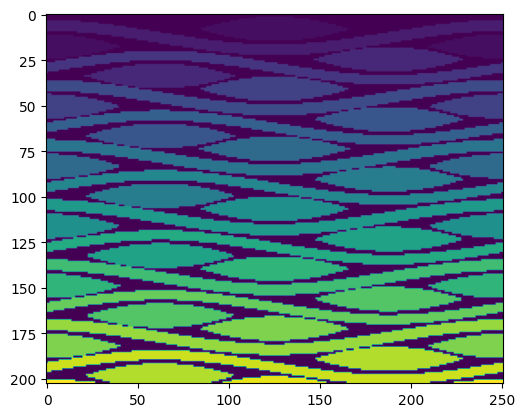

In [16]:
plt.imshow(numpy_array[:,:,30])



[0 1 2]


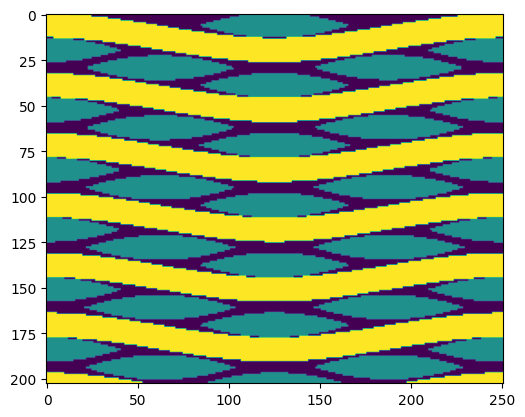

In [17]:
mask1 = numpy_array2[:,:,:,0] > .5
mask2 = numpy_array2[:,:,:,1] > .5



conditions = [mask1, mask2]
values = [1, 2]
out = np.select(conditions, values, 0)

print(np.unique(out))

plt.imshow( out[:,:,0])

np.save('160_10-layer_mn.npy', out)
